In [1]:
import os, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

from numpy import set_printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB



In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

* kiểm tra và tạo các thư mục (nếu chưa có)
* tập test 33%

# 5. Xây dựng và đánh giá mô hình học sâu Neutual Network

In [3]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from mlxtend.classifier import StackingClassifier
from kerastuner.tuners import RandomSearch
from scipy.stats import uniform

import numpy as np

In [4]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{exps_dir}/feature1/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 1.0, 1: 1.0}

In [5]:
x_test.shape

(330, 42)

In [6]:
x_train.shape

(1022, 42)

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Định nghĩa không gian siêu tham số
param_dist = {'C': uniform(0.1, 10),
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))}

# Khởi tạo mô hình SVM
svm_model = SVC()

# Sử dụng RandomizedSearchCV để tinh chỉnh siêu tham số
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=5, scoring='accuracy', cv=5)
random_search.fit(x_train, y_train)

# In ra thông tin của mô hình SVM tốt nhất
print("Best SVM Hyperparameters:")
print(random_search.best_params_)
C=random_search.best_params_['C']
gamma=random_search.best_params_['gamma']
kernel=random_search.best_params_['kernel']

Best SVM Hyperparameters:
{'C': 1.5938824929771167, 'gamma': 0.001, 'kernel': 'rbf'}


In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Định nghĩa không gian siêu tham số
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
}

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier()

# Sử dụng RandomizedSearchCV để tinh chỉnh siêu tham số
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=5, scoring='accuracy', cv=5)
random_search_rf.fit(x_train, y_train)

# In ra thông tin của mô hình Random Forest tốt nhất
print("Best Random Forest Hyperparameters:")
print(random_search_rf.best_params_)
n_estimators=random_search_rf.best_params_['n_estimators']
max_depth=random_search_rf.best_params_['max_depth']


Best Random Forest Hyperparameters:
{'n_estimators': 200, 'max_depth': 15}


In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform, randint

# Định nghĩa không gian siêu tham số cho Gradient Boosting
param_dist_gb = {'n_estimators': randint(50, 200),
                 'learning_rate': uniform(0.01, 0.1),
                 'max_depth': randint(3, 10),
                 'subsample': uniform(0.6, 0.4)}

# Khởi tạo mô hình Gradient Boosting
gb_model = GradientBoostingClassifier()

# Sử dụng RandomizedSearchCV để tinh chỉnh siêu tham số
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb, n_iter=5, scoring='accuracy', cv=5)
random_search_gb.fit(x_train, y_train)

# In ra thông tin của mô hình Gradient Boosting tốt nhất
print("Best Gradient Boosting Hyperparameters:")
print(random_search_gb.best_params_)
best_gb_model = random_search_gb.best_estimator_
max_depthgb=random_search_gb.best_params_['max_depth']
learning_rate=random_search_gb.best_params_['learning_rate']
n_estimatorsgb=random_search_gb.best_params_['n_estimators']
subsample=random_search_gb.best_params_['subsample']

Best Gradient Boosting Hyperparameters:
{'learning_rate': 0.0747229621284752, 'max_depth': 7, 'n_estimators': 128, 'subsample': 0.9705315018129588}


In [10]:
from sklearn.tree import DecisionTreeClassifier

# Định nghĩa không gian siêu tham số cho Decision Tree
param_dist_dt = {'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
                 'max_depth': randint(3, 10),
                 'min_samples_split': randint(2, 20),
                 'min_samples_leaf': randint(1, 20)}

# Khởi tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier()

# Sử dụng RandomizedSearchCV để tinh chỉnh siêu tham số
random_search_dt = RandomizedSearchCV(dt_model, param_distributions=param_dist_dt, n_iter=5, scoring='accuracy', cv=5)
random_search_dt.fit(x_train, y_train)

# In ra thông tin của mô hình Decision Tree tốt nhất
print("Best Decision Tree Hyperparameters:")
print(random_search_dt.best_params_)
best_dt_model = random_search_dt.best_estimator_
criterion=random_search_dt.best_params_['criterion']
max_depthdt=random_search_dt.best_params_['max_depth']
min_samples_leaf=random_search_dt.best_params_['min_samples_leaf']
splitter=random_search_dt.best_params_['splitter']
min_samples_split=random_search_dt.best_params_['min_samples_split']


Best Decision Tree Hyperparameters:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 9, 'splitter': 'best'}


#### * Xây dựng model:

In [11]:
from tensorflow.keras.optimizers import Adam
lr=0.0001

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=2048, step=32),
                           activation='relu', input_dim=42))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=2048, step=32),
                           activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(units=hp.Int('units_3', min_value=32, max_value=2048, step=32),
                           activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(units=hp.Int('units_4', min_value=32, max_value=2048, step=32),
                           activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(units=hp.Int('units_5', min_value=32, max_value=2048, step=32),
                           activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# keras_clf = KerasClassifier(build_fn=create_keras_model, epochs=10)
rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
gb_model = SVC(C=C,kernel=kernel,gamma=gamma,probability=True)
dtc_model=DecisionTreeClassifier(criterion=criterion,max_depth=max_depthdt,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,splitter=splitter)
bg_model=GradientBoostingClassifier(n_estimators=n_estimatorsgb, learning_rate=learning_rate, max_depth=max_depthgb, subsample=subsample)
# Huấn luyện các mô hình cơ sở
rf_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)
dtc_model.fit(x_train, y_train)
bg_model.fit(x_train, y_train)


# Dự đoán đầu ra của các mô hình cơ sở
rf_pred = rf_model.predict(x_test)
gb_pred = gb_model.predict(x_test)
dtc_pred = dtc_model.predict(x_test)
bg_pred = bg_model.predict(x_test)


# keras_pred = keras_clf.predict(x_test)
stacked_input = np.column_stack((rf_pred,dtc_pred))
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

lr=0.0001
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 30)

early_stopping = EarlyStopping(monitor='val_accuracy',
    min_delta=0.00005,
    patience=50,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=20,
    min_lr=0.000001,
    verbose=1,
)
# Tạo đối tượng RandomSearch tuner
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5)

# Tìm kiếm tham số tốt nhất
tuner.search(x_train, y_train, epochs=120, validation_data=(x_test, y_test),callbacks=[early_stopping,lr_scheduler])

# Lấy mô hình tốt nhất
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Reloading Tuner from .\untitled_project\tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1888)              81184     
                                                                 
 batch_normalization (BatchN  (None, 1888)             7552      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1888)              0         
                                                                 
 dense_1 (Dense)             (None, 736)               1390304   
                                                                 
 batch_normalization_1 (Batc  (None, 736)              2944      
 hNormalization)                                                 
                                                                 
 dro

In [12]:
best_trials = tuner.oracle.get_best_trials(1)[0].hyperparameters.values
best_trials

{'units_1': 1888, 'units_2': 736, 'units_3': 576, 'units_4': 64, 'units_5': 96}

#### * Xây dựng Stacked_model:

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.optimizers import Adam


# Hàm để xây dựng mô hình đầu ra
def model_output(unit1, unit2, unit3, unit4, unit5):
    lr=0.0001
    stacked_model = Sequential()
    stacked_model.add(Dense(unit1, activation='relu',input_dim=2))
    stacked_model.add(BatchNormalization())
    stacked_model.add(Dropout(0.5))

    # Thêm các lớp ẩn
    stacked_model.add(Dense(unit2, activation='relu'))
    stacked_model.add(BatchNormalization())
    stacked_model.add(Dropout(0.5))

    stacked_model.add(Dense(unit3, activation='relu'))
    stacked_model.add(BatchNormalization())
    stacked_model.add(Dropout(0.5))

    stacked_model.add(Dense(unit4, activation='relu'))
    stacked_model.add(BatchNormalization())
    stacked_model.add(Dropout(0.5))

    stacked_model.add(Dense(unit5, activation='relu'))
    stacked_model.add(BatchNormalization())
    stacked_model.add(Dropout(0.5))

    # Lớp đầu ra với activation function 'sigmoid' cho bài toán phân lớp nhị phân
    stacked_model.add(Dense(1, activation='sigmoid'))
    stacked_model.compile(optimizer=Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return stacked_model

# # Lấy các tham số tối ưu từ tuner
# best_trials = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

# # Xây dựng mô hình stacked với các tham số tối ưu
# stacked_model = model_output(best_trials['units_1'], best_trials['units_2'], best_trials['units_3'],
#                               best_trials['units_4'], best_trials['units_5'])
# stacked_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Huấn luyện mô hình stacked trên dữ liệu đầu ra của các mô hình cơ sở
# stacked_model.fit(stacked_input, y_test, epochs=50, batch_size=32, validation_split=0.2)

# # Dự đoán và đánh giá mô hình stacked
# binary_stacked_pred = stacked_model.predict(stacked_input)
# binary_stacked_pred = (binary_stacked_pred > 0.5).astype(int)

# # Sử dụng cú pháp trích xuất trên NumPy array
# accuracy_stacked = accuracy_score(y_test_array, binary_stacked_pred)
# print(f'Accuracy of Stacked Model: {accuracy_stacked}')


#### * Sử dụng Stacking để kết hợp dự đoán của các mô hình cơ sở để tạo ra một mô hình cuối cùng:

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
import numpy as np
def create_keras_model():
    # Thêm các lớp khác vào đây
    best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return best_model

# keras_clf = KerasClassifier(build_fn=create_keras_model, epochs=10)
rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
gb_model = SVC(C=C,kernel=kernel,gamma=gamma,probability=True)
dtc_model=DecisionTreeClassifier(criterion=criterion,max_depth=max_depthdt,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,splitter=splitter)
bg_model=GradientBoostingClassifier(n_estimators=n_estimatorsgb, learning_rate=learning_rate, max_depth=max_depthgb, subsample=subsample)
# Huấn luyện các mô hình cơ sở
rf_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)
dtc_model.fit(x_train, y_train)
bg_model.fit(x_train, y_train)


# Dự đoán đầu ra của các mô hình cơ sở
rf_pred = rf_model.predict(x_test)
gb_pred = gb_model.predict(x_test)
dtc_pred = dtc_model.predict(x_test)
bg_pred = bg_model.predict(x_test)


# keras_pred = keras_clf.predict(x_test)
stacked_input = np.column_stack((rf_pred,dtc_pred))


#history=model.fit(x=x_train,y=y_train,
          #validation_data=(x_test,y_test),class_weight=class_weights_dict ,
          #batch_size=64,epochs=120, callbacks=[confusion_matrix_callback])

keras_clf = KerasClassifier(build_fn=model_output, unit1=best_trials['units_1'], unit2=best_trials['units_2'], unit3=best_trials['units_3'], unit4=best_trials['units_4'], unit5=best_trials['units_5'],batch_size=64,epochs=120,callbacks=[early_stopping,lr_scheduler])

# Clone lại để tránh thay đổi trực tiếp vào mô hình gốc
keras_clf = clone(keras_clf)

# Xây dựng mô hình stacking
stacked_model = StackingClassifier(
    classifiers=[rf_model, dtc_model],
    meta_classifier=keras_clf
)

# Tiếp tục với việc huấn luyện và đánh giá mô hình stacking
stacked_model.fit(stacked_input, y_test)
stacked_pred = stacked_model.predict(stacked_input)
stacked_pred

Epoch 1/120
6/6 [==============================] - 2s 14ms/step - loss: 1.0362 - accuracy: 0.4818 - lr: 1.0000e-04
Epoch 2/120
6/6 [==============================] - 0s 12ms/step - loss: 0.9415 - accuracy: 0.5545 - lr: 1.0000e-04
Epoch 3/120
6/6 [==============================] - 0s 13ms/step - loss: 0.8282 - accuracy: 0.5879 - lr: 1.0000e-04
Epoch 4/120
6/6 [==============================] - 0s 12ms/step - loss: 0.8461 - accuracy: 0.6212 - lr: 1.0000e-04
Epoch 5/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7658 - accuracy: 0.6455 - lr: 1.0000e-04
Epoch 6/120
6/6 [==============================] - 0s 12ms/step - loss: 0.8037 - accuracy: 0.6455 - lr: 1.0000e-04
Epoch 7/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7615 - accuracy: 0.6455 - lr: 1.0000e-04
Epoch 8/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7481 - accuracy: 0.6758 - lr: 1.0000e-04
Epoch 9/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7830 -

6/6 [==============================] - 0s 12ms/step - loss: 0.6954 - accuracy: 0.6788 - lr: 1.0000e-04
Epoch 19/120
6/6 [==============================] - 0s 13ms/step - loss: 0.7745 - accuracy: 0.6970 - lr: 1.0000e-04
Epoch 20/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7377 - accuracy: 0.7000 - lr: 1.0000e-04
Epoch 21/120
6/6 [==============================] - 0s 12ms/step - loss: 0.8238 - accuracy: 0.6636 - lr: 1.0000e-04
Epoch 22/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6790 - accuracy: 0.7212 - lr: 1.0000e-04
Epoch 23/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7043 - accuracy: 0.6970 - lr: 1.0000e-04
Epoch 24/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6744 - accuracy: 0.7242 - lr: 1.0000e-04
Epoch 25/120
6/6 [==============================] - 0s 12ms/step - loss: 0.8126 - accuracy: 0.6697 - lr: 1.0000e-04
Epoch 26/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7319 - acc

6/6 [==============================] - 0s 12ms/step - loss: 0.8242 - accuracy: 0.6818 - lr: 1.0000e-04
Epoch 36/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7001 - accuracy: 0.7485 - lr: 1.0000e-04
Epoch 37/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7588 - accuracy: 0.7212 - lr: 1.0000e-04
Epoch 38/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6523 - accuracy: 0.7364 - lr: 1.0000e-04
Epoch 39/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6803 - accuracy: 0.7273 - lr: 1.0000e-04
Epoch 40/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7225 - accuracy: 0.7273 - lr: 1.0000e-04
Epoch 41/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6791 - accuracy: 0.7273 - lr: 1.0000e-04
Epoch 42/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6733 - accuracy: 0.7000 - lr: 1.0000e-04
Epoch 43/120
6/6 [==============================] - 0s 13ms/step - loss: 0.6431 - acc

6/6 [==============================] - 0s 12ms/step - loss: 0.6575 - accuracy: 0.7455 - lr: 1.0000e-04
Epoch 54/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6716 - accuracy: 0.7333 - lr: 1.0000e-04
Epoch 55/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6494 - accuracy: 0.7273 - lr: 1.0000e-04
Epoch 56/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6464 - accuracy: 0.7697 - lr: 1.0000e-04
Epoch 57/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6540 - accuracy: 0.7455 - lr: 1.0000e-04
Epoch 58/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6643 - accuracy: 0.7667 - lr: 1.0000e-04
Epoch 59/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6583 - accuracy: 0.7455 - lr: 1.0000e-04
Epoch 60/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6476 - accuracy: 0.7121 - lr: 1.0000e-04
Epoch 61/120
6/6 [==============================] - 0s 12ms/step - loss: 0.5739 - acc

6/6 [==============================] - 0s 12ms/step - loss: 0.6880 - accuracy: 0.7515 - lr: 1.0000e-04
Epoch 71/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6471 - accuracy: 0.7303 - lr: 1.0000e-04
Epoch 72/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6287 - accuracy: 0.7333 - lr: 1.0000e-04
Epoch 73/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6149 - accuracy: 0.7424 - lr: 1.0000e-04
Epoch 74/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6114 - accuracy: 0.7333 - lr: 1.0000e-04
Epoch 75/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6205 - accuracy: 0.7727 - lr: 1.0000e-04
Epoch 76/120
6/6 [==============================] - 0s 13ms/step - loss: 0.6472 - accuracy: 0.7606 - lr: 1.0000e-04
Epoch 77/120
6/6 [==============================] - 0s 13ms/step - loss: 0.6186 - accuracy: 0.7394 - lr: 1.0000e-04
Epoch 78/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6736 - acc

6/6 [==============================] - 0s 12ms/step - loss: 0.5792 - accuracy: 0.7636 - lr: 1.0000e-04
Epoch 88/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6200 - accuracy: 0.7545 - lr: 1.0000e-04
Epoch 89/120
6/6 [==============================] - 0s 13ms/step - loss: 0.5965 - accuracy: 0.7455 - lr: 1.0000e-04
Epoch 90/120
6/6 [==============================] - 0s 13ms/step - loss: 0.6284 - accuracy: 0.7636 - lr: 1.0000e-04
Epoch 91/120
6/6 [==============================] - 0s 13ms/step - loss: 0.5672 - accuracy: 0.7879 - lr: 1.0000e-04
Epoch 92/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6779 - accuracy: 0.7212 - lr: 1.0000e-04
Epoch 93/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6353 - accuracy: 0.7667 - lr: 1.0000e-04
Epoch 94/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6790 - accuracy: 0.7909 - lr: 1.0000e-04
Epoch 95/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6325 - acc

6/6 [==============================] - 0s 12ms/step - loss: 0.6244 - accuracy: 0.7242 - lr: 1.0000e-04
Epoch 106/120
6/6 [==============================] - 0s 12ms/step - loss: 0.5298 - accuracy: 0.7727 - lr: 1.0000e-04
Epoch 107/120
6/6 [==============================] - 0s 12ms/step - loss: 0.5480 - accuracy: 0.7697 - lr: 1.0000e-04
Epoch 108/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6262 - accuracy: 0.7485 - lr: 1.0000e-04
Epoch 109/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6016 - accuracy: 0.7636 - lr: 1.0000e-04
Epoch 110/120
6/6 [==============================] - 0s 12ms/step - loss: 0.5732 - accuracy: 0.7818 - lr: 1.0000e-04
Epoch 111/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6220 - accuracy: 0.7545 - lr: 1.0000e-04
Epoch 112/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6474 - accuracy: 0.7424 - lr: 1.0000e-04
Epoch 113/120
6/6 [==============================] - 0s 12ms/step - loss: 0.62

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [16]:
print(keras_clf)

In [17]:
stacked_model.fit(stacked_input, y_test)
# Dự đoán và đánh giá mô hình stacked
stacked_pred = stacked_model.predict(stacked_input)
stacked_pred_binary = (stacked_pred > 0.5).astype(int)
accuracy_stacked = accuracy_score(y_test, stacked_pred_binary)
print(f'Accuracy of Stacked Model: {accuracy_stacked}')

Epoch 1/120
6/6 [==============================] - 2s 12ms/step - loss: 1.1664 - accuracy: 0.4606 - lr: 1.0000e-04
Epoch 2/120
6/6 [==============================] - 0s 12ms/step - loss: 1.0522 - accuracy: 0.5485 - lr: 1.0000e-04
Epoch 3/120
6/6 [==============================] - 0s 12ms/step - loss: 0.8850 - accuracy: 0.5818 - lr: 1.0000e-04
Epoch 4/120
6/6 [==============================] - 0s 12ms/step - loss: 0.9300 - accuracy: 0.5394 - lr: 1.0000e-04
Epoch 5/120
6/6 [==============================] - 0s 12ms/step - loss: 0.9224 - accuracy: 0.5727 - lr: 1.0000e-04
Epoch 6/120
6/6 [==============================] - 0s 12ms/step - loss: 0.8512 - accuracy: 0.6000 - lr: 1.0000e-04
Epoch 7/120
6/6 [==============================] - 0s 12ms/step - loss: 0.8251 - accuracy: 0.6212 - lr: 1.0000e-04
Epoch 8/120
6/6 [==============================] - 0s 13ms/step - loss: 0.7814 - accuracy: 0.6303 - lr: 1.0000e-04
Epoch 9/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7969 -

6/6 [==============================] - 0s 12ms/step - loss: 0.7393 - accuracy: 0.6939 - lr: 1.0000e-04
Epoch 19/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7452 - accuracy: 0.7152 - lr: 1.0000e-04
Epoch 20/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7028 - accuracy: 0.7152 - lr: 1.0000e-04
Epoch 21/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7608 - accuracy: 0.6758 - lr: 1.0000e-04
Epoch 22/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7799 - accuracy: 0.6970 - lr: 1.0000e-04
Epoch 23/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7184 - accuracy: 0.7030 - lr: 1.0000e-04
Epoch 24/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6989 - accuracy: 0.7030 - lr: 1.0000e-04
Epoch 25/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7795 - accuracy: 0.7061 - lr: 1.0000e-04
Epoch 26/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7289 - acc

6/6 [==============================] - 0s 12ms/step - loss: 0.7769 - accuracy: 0.7182 - lr: 1.0000e-04
Epoch 36/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7483 - accuracy: 0.7061 - lr: 1.0000e-04
Epoch 37/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7397 - accuracy: 0.7242 - lr: 1.0000e-04
Epoch 38/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6981 - accuracy: 0.7212 - lr: 1.0000e-04
Epoch 39/120
6/6 [==============================] - 0s 11ms/step - loss: 0.6598 - accuracy: 0.7121 - lr: 1.0000e-04
Epoch 40/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7120 - accuracy: 0.7061 - lr: 1.0000e-04
Epoch 41/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6224 - accuracy: 0.7212 - lr: 1.0000e-04
Epoch 42/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7112 - accuracy: 0.7242 - lr: 1.0000e-04
Epoch 43/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6133 - acc

6/6 [==============================] - 0s 12ms/step - loss: 0.6709 - accuracy: 0.7273 - lr: 1.0000e-04
Epoch 54/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6344 - accuracy: 0.7303 - lr: 1.0000e-04
Epoch 55/120
6/6 [==============================] - 0s 12ms/step - loss: 0.5996 - accuracy: 0.7909 - lr: 1.0000e-04
Epoch 56/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6705 - accuracy: 0.7273 - lr: 1.0000e-04
Epoch 57/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6622 - accuracy: 0.7364 - lr: 1.0000e-04
Epoch 58/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6469 - accuracy: 0.7333 - lr: 1.0000e-04
Epoch 59/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7254 - accuracy: 0.7182 - lr: 1.0000e-04
Epoch 60/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6770 - accuracy: 0.7545 - lr: 1.0000e-04
Epoch 61/120
6/6 [==============================] - 0s 11ms/step - loss: 0.6852 - acc

6/6 [==============================] - 0s 12ms/step - loss: 0.6259 - accuracy: 0.7576 - lr: 1.0000e-04
Epoch 71/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7035 - accuracy: 0.7212 - lr: 1.0000e-04
Epoch 72/120
6/6 [==============================] - 0s 11ms/step - loss: 0.6771 - accuracy: 0.7303 - lr: 1.0000e-04
Epoch 73/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6711 - accuracy: 0.7273 - lr: 1.0000e-04
Epoch 74/120
6/6 [==============================] - 0s 11ms/step - loss: 0.6591 - accuracy: 0.7333 - lr: 1.0000e-04
Epoch 75/120
6/6 [==============================] - 0s 12ms/step - loss: 0.7607 - accuracy: 0.7121 - lr: 1.0000e-04
Epoch 76/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6334 - accuracy: 0.7606 - lr: 1.0000e-04
Epoch 77/120
6/6 [==============================] - 0s 11ms/step - loss: 0.5862 - accuracy: 0.7485 - lr: 1.0000e-04
Epoch 78/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6388 - acc

6/6 [==============================] - 0s 12ms/step - loss: 0.6419 - accuracy: 0.7485 - lr: 1.0000e-04
Epoch 88/120
6/6 [==============================] - 0s 12ms/step - loss: 0.5983 - accuracy: 0.7576 - lr: 1.0000e-04
Epoch 89/120
6/6 [==============================] - 0s 11ms/step - loss: 0.6576 - accuracy: 0.7576 - lr: 1.0000e-04
Epoch 90/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6173 - accuracy: 0.7485 - lr: 1.0000e-04
Epoch 91/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6111 - accuracy: 0.7515 - lr: 1.0000e-04
Epoch 92/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6157 - accuracy: 0.7485 - lr: 1.0000e-04
Epoch 93/120
6/6 [==============================] - 0s 11ms/step - loss: 0.5974 - accuracy: 0.7394 - lr: 1.0000e-04
Epoch 94/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6100 - accuracy: 0.7788 - lr: 1.0000e-04
Epoch 95/120
6/6 [==============================] - 0s 12ms/step - loss: 0.5813 - acc

6/6 [==============================] - 0s 12ms/step - loss: 0.6249 - accuracy: 0.7333 - lr: 1.0000e-04
Epoch 106/120
6/6 [==============================] - 0s 12ms/step - loss: 0.5687 - accuracy: 0.7697 - lr: 1.0000e-04
Epoch 107/120
6/6 [==============================] - 0s 14ms/step - loss: 0.6026 - accuracy: 0.7697 - lr: 1.0000e-04
Epoch 108/120
6/6 [==============================] - 0s 12ms/step - loss: 0.5801 - accuracy: 0.7606 - lr: 1.0000e-04
Epoch 109/120
6/6 [==============================] - 0s 12ms/step - loss: 0.5894 - accuracy: 0.7273 - lr: 1.0000e-04
Epoch 110/120
6/6 [==============================] - 0s 12ms/step - loss: 0.5288 - accuracy: 0.7758 - lr: 1.0000e-04
Epoch 111/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6165 - accuracy: 0.7394 - lr: 1.0000e-04
Epoch 112/120
6/6 [==============================] - 0s 12ms/step - loss: 0.6230 - accuracy: 0.7818 - lr: 1.0000e-04
Epoch 113/120
6/6 [==============================] - 0s 12ms/step - loss: 0.61

#### * Kết quả đánh giá mô hình:

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, stacked_pred)
print("Accuracy:", accuracy)

# Hiển thị báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, stacked_pred,labels=[1,0]))

# # Hiển thị ma trận nhầm lẫn
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred,labels=[1,0]))

Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.85      0.73        88
           0       0.94      0.83      0.88       242

    accuracy                           0.83       330
   macro avg       0.79      0.84      0.81       330
weighted avg       0.86      0.83      0.84       330



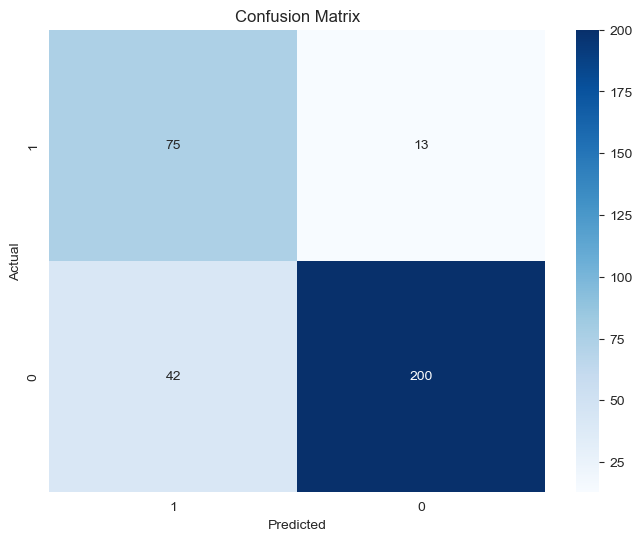

In [19]:
# Dự đoán


# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, stacked_pred,labels=[1,0])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[1,0], yticklabels=[1,0])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
def check_result(prediction):
    prediction = (prediction > 0.5).astype(int)
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [21]:
solandung=0
hopdonggianlan=0
for indx in range(len(x_test)):
    y_predict = stacked_model.predict(stacked_input)
    #print(y_predict[0][0])
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict[indx]))
    print("----------------------------")
    if Y_check==check_result(y_predict[indx]):
        solandung+=1
        if Y_check=='Y':
            hopdonggianlan+=1
    

11/11 [==============================] - 0s 2ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N

11/11 [==============================] - 0s 2ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: Y
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: Y
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N

11/11 [==============================] - 0s 3ms/step
True: N
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: Y
----------------------------
11/11 [==============================] - 0s 2ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 2ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 2ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: Y
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 2ms/step
True: Y
Predicted: Y

11/11 [==============================] - 0s 3ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: Y
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 3ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N

11/11 [==============================] - 0s 2ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: Y
----------------------------
11/11 [==============================] - 0s 2ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 3ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 2ms/step
True: Y
Predicted: Y
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: N
----------------------------
11/11 [==============================] - 0s 2ms/step
True: N
Predicted: N

In [22]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")
print(f"Số hợp đồng gian lận trong lần kiểm tra: {hopdonggianlan} chiếm khoảng {(hopdonggianlan/len(y_test[y_test['fraud_reported']==1]))*100}% so với thực tế")


Số lần dự đoán đúng: 275 chiếm khoảng 83.33333333333334% tổng lần dự đoán
Số hợp đồng gian lận trong lần kiểm tra: 75 chiếm khoảng 85.22727272727273% so với thực tế
